***Note: this is the svgBondGraph.ipynb notebook. The
PDF version "The svgBondGraph module"
is available [here](svgBondGraph.pdf).***

# Introduction
Bond graphs can be represented graphically in scalar vector graphics (SGV) format. Such representations can be generated ab initio using an editor such as xfig or inkscape, or can be generated from legacy MTT files in fig format. This document describes how bond graphs in svg format can be converted to __[BondGraphTools](http://pypi.org/project/BondGraphTools/)__ format.

# Converting from fig to svg
Legacy bond graph graphical representation generated by xfig  are .fig files.
.fig graphics can be converted to .svg graphics in various ways including via inkscape. However, fig2dev provides a simple conversion approach:

!fig2dev -Lsvg RC_abg.fig > RC_abg.svg

This gives the svg representation:

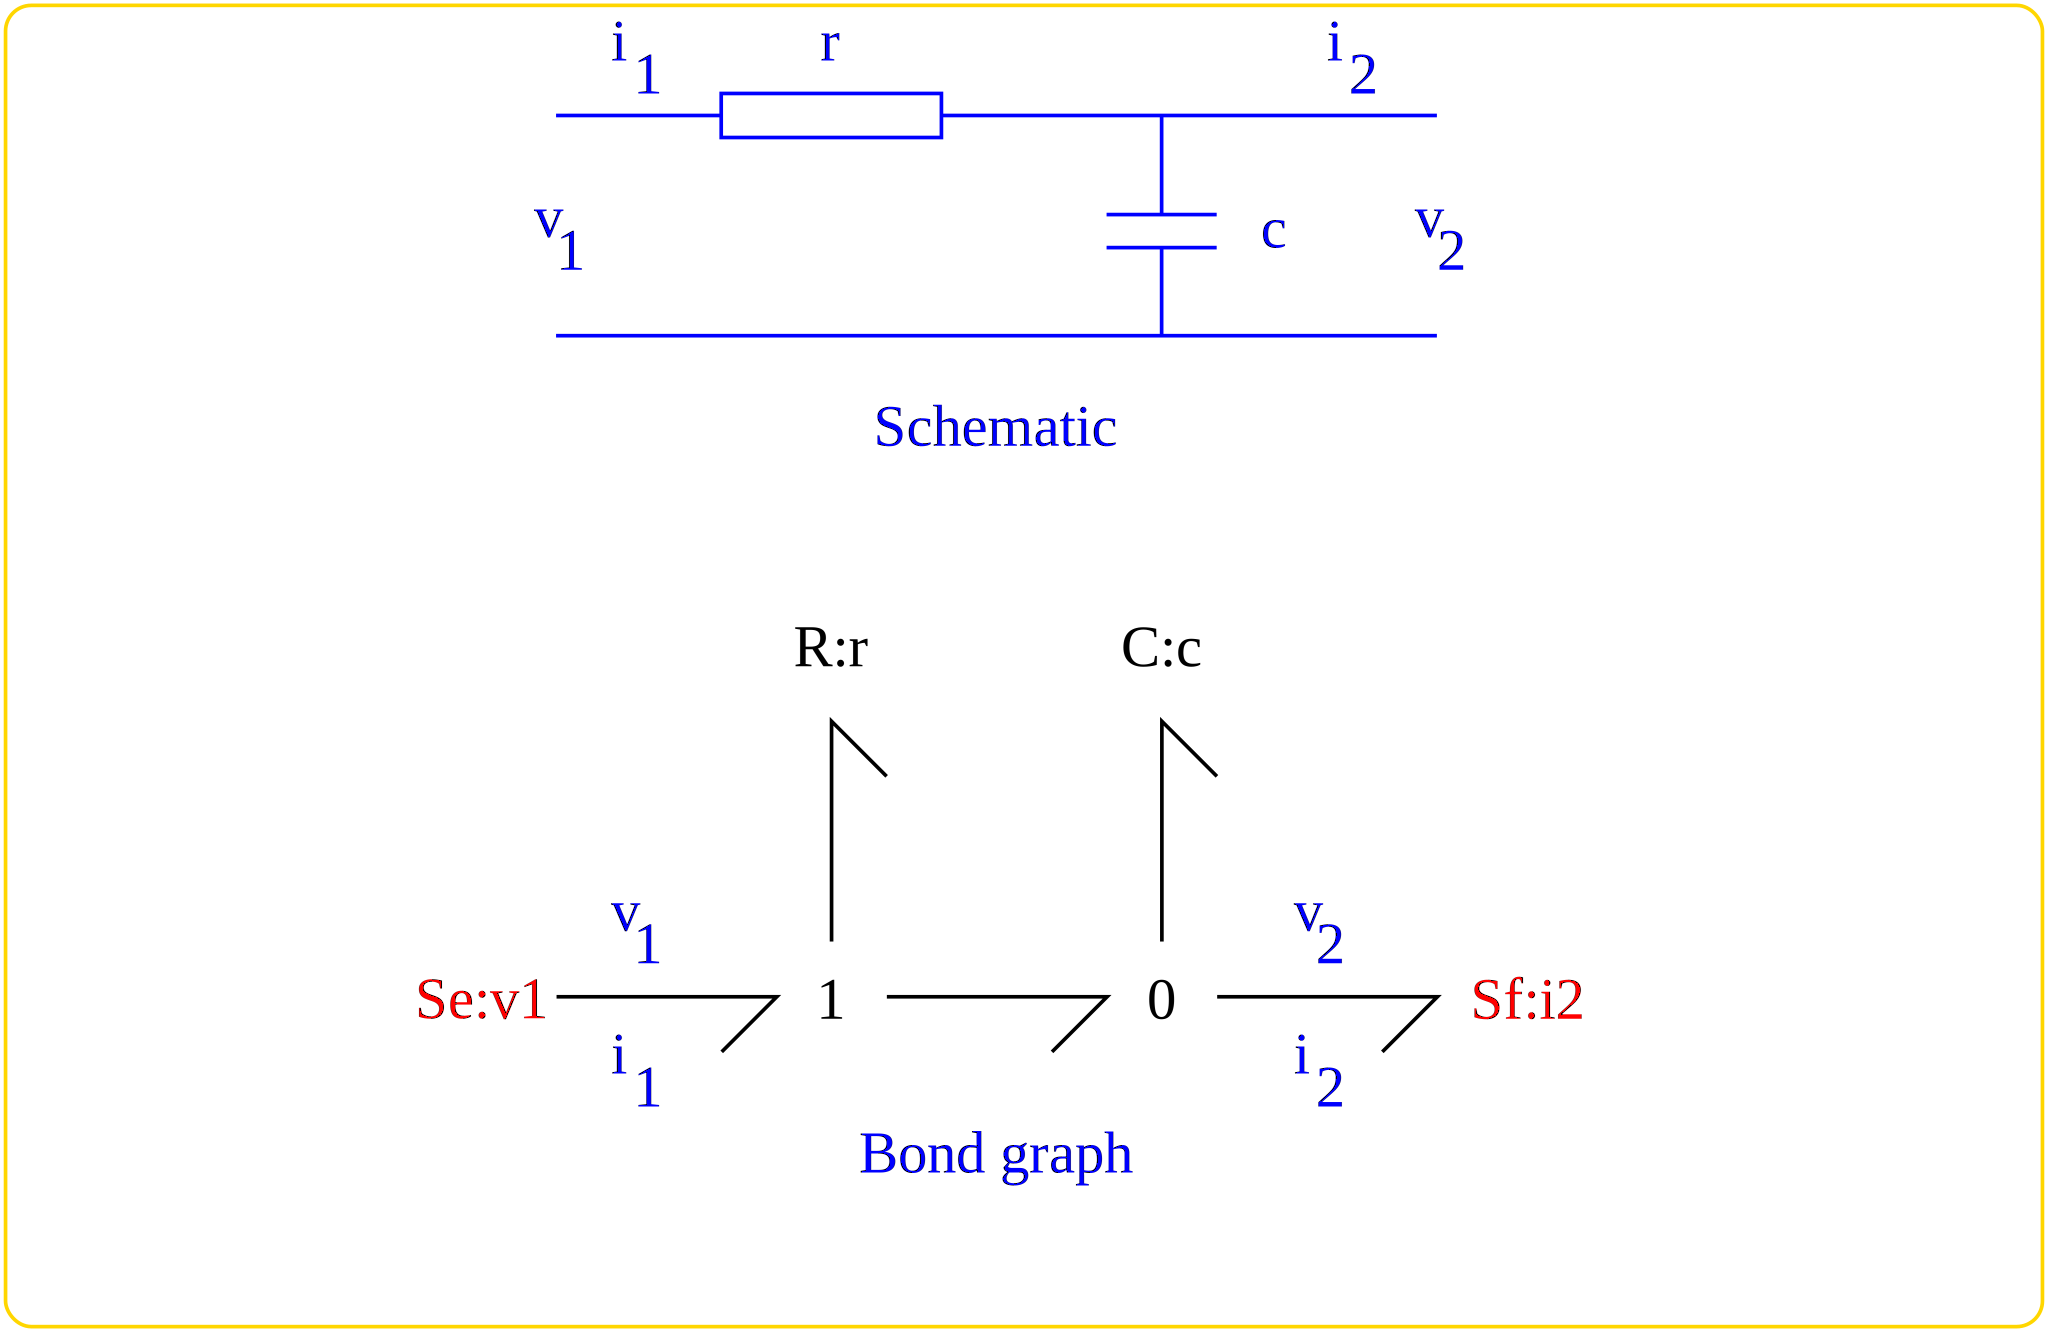

In [1]:
import IPython.display as disp
disp.SVG('RC_abg.svg')

# Converting from graphical to computational representation
SVG files are in XML format and, as such, can be parsed using python modules such as **lxml** and **svgpathtools**.
**svgBondGraph** provides the tools to convert bond graphs in svg format to bond graphs in __[BondGraphTools](http://pypi.org/project/BondGraphTools/)__ format.

In [2]:
import BondGraphTools as bgt
import sympy as sp
import svgBondGraph as sbg
sbg.model('RC_abg.svg')

{}


This generates the file RC_abg.py which can be imported as usual. (Note that, by default, the BG itself is distinguished from annotations by colour: the default includes black and red)

RC_abg.py can be imported and analysed using BondGraphTools.
For example:

In [3]:
import RC_abg; RC = RC_abg.model(); help(RC_abg)

Help on module RC_abg:

NAME
    RC_abg

FUNCTIONS
    model()
        Acausal bond graph RC_abg.py
        Created by svgBondGraph at Wed May 22 09:46:30 2024 from RC_abg.svg
        
        Usage:
        import RC_abg; model = RC_abg.model()

FILE
    /home/peterg/WORK/Research/SystemsBiology/Notes/2024/Tutorial/svgBondGraph/RC_abg.py




Various properties of the BGT model can now be extracted.

In [4]:
RC.state_vars

{'x_0': (C: c, 'q_0')}

In [5]:
RC.constitutive_relations

[dx_0 - u_1 - u_0/r + x_0/(c*r)]

In [6]:
RC.control_vars

{'u_0': (SS: v1, 'e'), 'u_1': (SS: i2, 'f')}

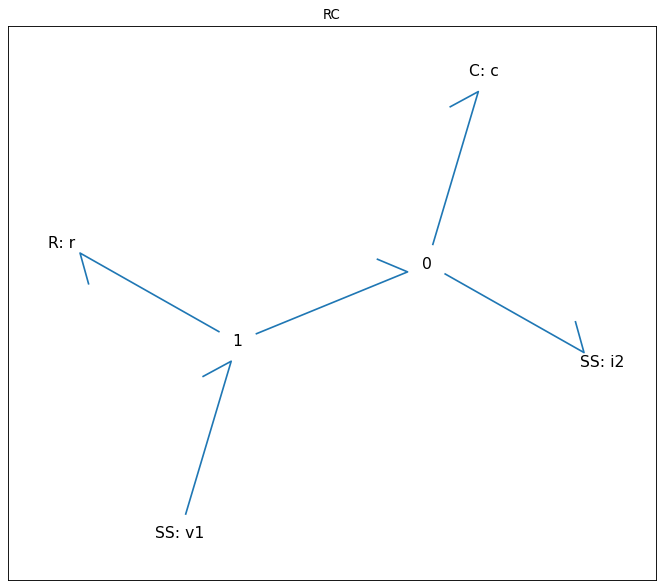

In [7]:
bgt.draw(RC)

This can, for example, be simulated for numerical parameter values.

# A biomolecular example.

!fig2dev -Lsvg ABCDE_abg.fig > ABCDE_abg.svg

This gives the svg representation:

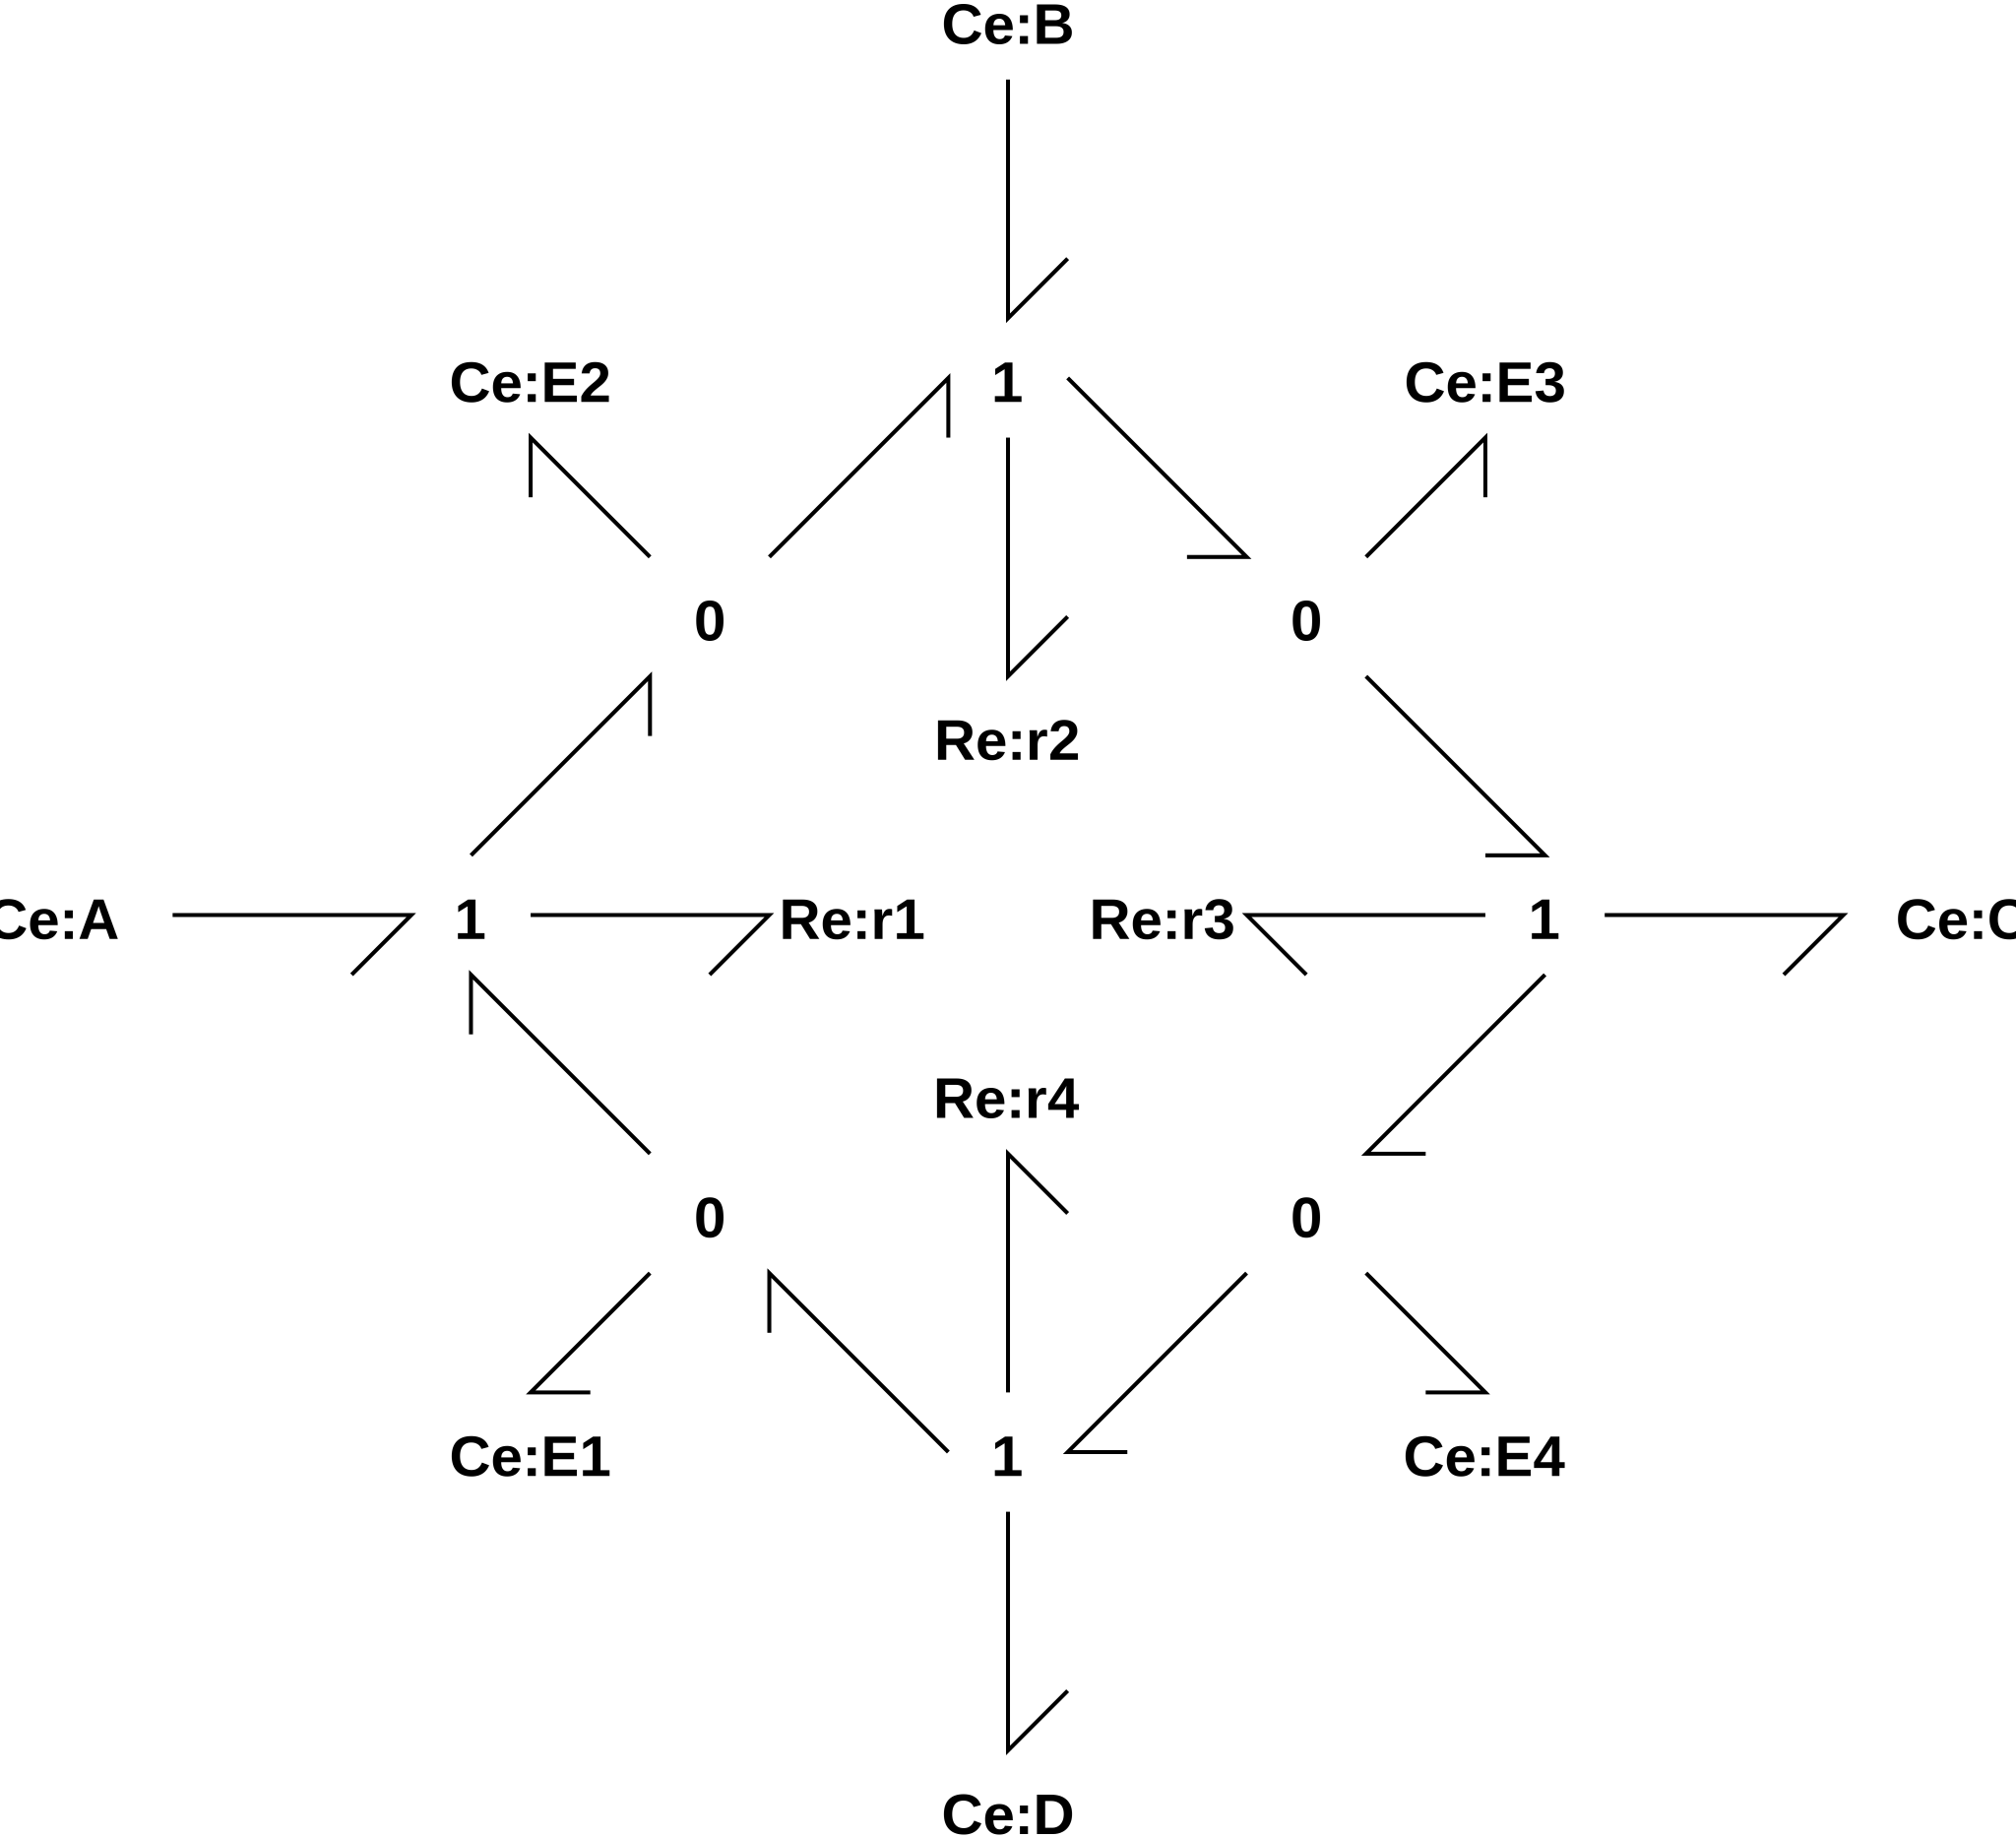

In [8]:
disp.SVG('ABCDE_abg.svg')

In [9]:
sbg.model('ABCDE_abg.svg')

Converting one-port r2 to two-port
Converting one-port r4 to two-port
Converting one-port r1 to two-port
Converting one-port r3 to two-port
{}


This generates ABCDE_abg.py which can be imported as usual and is then available for, for example, stoichiometric analysis.

In [10]:
import ABCDE_abg
ABCDE = ABCDE_abg.model()

In [11]:
ABCDE.state_vars

{'x_0': (C: A, 'q_0'),
 'x_1': (C: B, 'q_0'),
 'x_2': (C: C, 'q_0'),
 'x_3': (C: D, 'q_0'),
 'x_4': (C: E1, 'q_0'),
 'x_5': (C: E2, 'q_0'),
 'x_6': (C: E3, 'q_0'),
 'x_7': (C: E4, 'q_0')}

In [12]:
ABCDE.constitutive_relations

[K_A*K_E1*kappa_r1*x_0*x_4 - K_E2*kappa_r1*x_5 + dx_0,
 K_B*K_E2*kappa_r2*x_1*x_5 - K_E3*kappa_r2*x_6 + dx_1,
 K_C*K_E4*kappa_r3*x_2*x_7 - K_E3*kappa_r3*x_6 + dx_2,
 K_D*K_E1*kappa_r4*x_3*x_4 - K_E4*kappa_r4*x_7 + dx_3,
 K_A*K_E1*kappa_r1*x_0*x_4 + K_D*K_E1*kappa_r4*x_3*x_4 - K_E2*kappa_r1*x_5 - K_E4*kappa_r4*x_7 + dx_4,
 -K_A*K_E1*kappa_r1*x_0*x_4 + K_B*K_E2*kappa_r2*x_1*x_5 + K_E2*kappa_r1*x_5 - K_E3*kappa_r2*x_6 + dx_5,
 -K_B*K_E2*kappa_r2*x_1*x_5 - K_C*K_E4*kappa_r3*x_2*x_7 + K_E3*kappa_r2*x_6 + K_E3*kappa_r3*x_6 + dx_6,
 K_C*K_E4*kappa_r3*x_2*x_7 - K_D*K_E1*kappa_r4*x_3*x_4 - K_E3*kappa_r3*x_6 + K_E4*kappa_r4*x_7 + dx_7]